In [38]:
#This program generates FIG. 3 
#Fig3A: Perturbation matrix in FB condition
#Fig3B: Comparison Perturbation matrix in FB condition and Spontanoues
#Fig3C: Plot of the number of significant changes in different scenarios with increasing FB input
#Fig Supplementary S3D: Percentage of positive changes in different scenarios with increasing FB input

In [39]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [40]:
#Importing some info I need 
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

#Print Some information about the mdodel
print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [41]:
# You select one folder "state" and the correspondant folder with the perturbation data  

folderFB='../simulations_data/REVISIONS_1/'

folder_state=folderFB+'Sp_input_e4_0pA_e5_150pA_e23_0pA_e6_0pA'

#folder_state=folderFB+'Sp_input_e5_0pA' 
#folder_state=folderFB+'Sp_input_e5_30pA' 
#folder_state=folderFB+'Sp_input_e5_60pA' 
#folder_state=folderFB+'Sp_input_e5_80pA' 
#folder_state=folderFB+'Sp_input_e5_110pA' 
#folder_state=folderFB+'Sp_input_e5_140pA' 
#folder_state=folderFB+'Sp_input_e5_170pA' 
#folder_state=folderFB+'Sp_input_e5_200pA' 
#folder_state=folderFB+'Sp_input_e5_230pA' 
#folder_state=folderFB+'Sp_input_e5_260pA' 
#folder_state=folderFB+'Sp_input_e5_280pA' 
#folder_state=folderFB+'Sp_input_e5_310pA' 
#folder_state=folderFB+'Sp_input_e5_370pA' 
#folder_state=folderFB+'Sp_input_e5_400pA' 



#Perturbation data
#Feedback input:


folder_input=folderFB+'Sim_e4_0pA_e5_150pA_pert_30pA'

#folder_input=folderFB+'Sim_e5_0pA' 
#folder_input=folderFB+'Sim_e5_30pA' 
#folder_input=folderFB+'Sim_e5_60pA' 
#folder_input=folderFB+'Sim_e5_80pA' 
#folder_input=folderFB+'Sim_e5_110pA' 
#folder_input=folderFB+'Sim_e5_140pA' 
#folder_input=folderFB+'Sim_e5_170pA' 
#folder_input=folderFB+'Sim_e5_200pA' 
#folder_input=folderFB+'Sim_e5_230pA' 
#folder_input=folderFB+'Sim_e5_260pA' 
#folder_input=folderFB+'Sim_e5_280pA' 
#folder_input=folderFB+'Sim_e5_310pA' 
#folder_input=folderFB+'Sim_e5_370pA' 
#folder_input=folderFB+'Sim_e5_400pA' 


#This is the threshold to check how much increase I am interested in 
threshold=0.2

In [42]:
#------------------------------------------------------------------------------
# Import the files 
#------------------------------------------------------------------------------

#This funciton takes the name of the folder and import all the spike data 
#The function returns the number of spikes for each group of neurons 

def take_files(a):
    
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [43]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups 
#------------------------------------------------------------------------------

#Funciton to compute the mean firing rates for all the neuron groups given the number spikes 
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    tot_sp_vip1 =  S_vip1num_spikes  #Layer 2/3
    rate_vip1= tot_sp_vip1/(N1*runtime)

    print("runtime: %s" %runtime)
    tot_sp_e23 =  S_e23num_spikes  #Layer 2/3
    #print(tot_sp_e23)
    #print(tot_sp_e23)
    #print(N[0][0])
    # Total number of spikes and rate for each group:
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)
    #print(tot_sp_vip23)

    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)

    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)


    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6


In [44]:
# Import the files in which no perturbation input is given 
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files(folder_state)

#Compute the rates

rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.520833
rate_e23: 0.125944 rate_pv23: 4.805128 rate_sst23: 3.872340 rate_vip23: 11.862928
rate_e4: 0.889109 rate_pv4: 7.153061 rate_sst4: 2.081761 rate_vip4: 6.382716
rate_e5: 14.573999 rate_pv5: 8.296296 rate_sst5: 3.839286 rate_vip5: 11.575758
rate_e6: 0.668514 rate_pv6: 16.160131 rate_sst6: 7.558824 rate_vip6: 6.877193


In [45]:
#I create the matrix that will contain the firing rate of each population in that particular simulation
#The input is given to one different population for every simulation.

Matrix_all=[] #create empty array

for i in ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6']:
    
    #i1 contains the data of the simualtion with perturbative input to first population (E2/3)
    #i2 (input to PV2/3), etc. 
    #I have 16 simulations: input to one population in each simualtion (16 populations in total)
    
    #Import the data of one simulation 'i'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_input+'/'+i)

    #compute the rates 
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)


    #PERCENTAGE CHANGE of the firing rate of EACH population (I compare to the value before the input)
    dif_e23=(rate_e23_1 - rate_e23_0)/ rate_e23_0
    dif_pv23=(rate_pv23_1 - rate_pv23_0) / rate_pv23_0
    dif_sst23=(rate_sst23_1 - rate_sst23_0) / rate_sst23_0
    dif_vip23= (rate_vip23_1 - rate_vip23_0)/rate_vip23_0
    dif_e4=(rate_e4_1 - rate_e4_0 )/rate_e4_0
    dif_pv4=(rate_pv4_1 - rate_pv4_0) /rate_pv4_0
    dif_sst4=(rate_sst4_1 - rate_sst4_0) /rate_sst4_0
    dif_vip4=(rate_vip4_1 - rate_vip4_0) /rate_vip4_0
    dif_e5=(rate_e5_1 - rate_e5_0) /rate_e5_0
    dif_pv5=(rate_pv5_1 - rate_pv5_0) /rate_pv5_0
    dif_sst5=(rate_sst5_1 - rate_sst5_0) /rate_sst5_0
    dif_vip5=(rate_vip5_1 - rate_vip5_0) /rate_vip5_0
    dif_e6=(rate_e6_1 - rate_e6_0) /rate_e6_0
    dif_pv6=(rate_pv6_1 - rate_pv6_0) /rate_pv6_0
    dif_sst6=(rate_sst6_1 - rate_sst6_0) /rate_sst6_0
    dif_vip6=(rate_vip6_1 - rate_vip6_0) /rate_vip6_0
    

    #I create the first row of the matrix containing all the rates
    dif_row=[dif_e23,dif_pv23,dif_sst23,dif_vip23,
            dif_e4,dif_pv4,dif_sst4,dif_vip4,
             dif_e5,dif_pv5,dif_sst5,dif_vip5,
             dif_e6,dif_pv6,dif_sst6,dif_vip6]
    
    Matrix_all.append(dif_row) #Fill the matrix with the data you computed
    
    
#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_spont1.txt','w+') #create the file to write the values of the matrix


# for i in range(0,16):
#     for j in range(0,16):
#         f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
#     f.write('\n')
# f.close()

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.583333
rate_e23: 3.981122 rate_pv23: 6.446154 rate_sst23: 5.950355 rate_vip23: 17.747664
rate_e4: 0.839274 rate_pv4: 10.343537 rate_sst4: 2.628931 rate_vip4: 10.666667
rate_e5: 15.229420 rate_pv5: 10.280423 rate_sst5: 4.982143 rate_vip5: 11.333333
rate_e6: 0.612299 rate_pv6: 16.741830 rate_sst6: 7.382353 rate_vip6: 7.263158
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.250000
rate_e23: 0.074703 rate_pv23: 14.020513 rate_sst23: 3.539007 rate_vip23: 10.934579
rate_e4: 0.740264 rate_pv4: 6.221088 rate_sst4: 1.849057 rate_vip4: 5.432099
rate_e5: 14.488529 rate_pv5: 7.439153 rate_sst5: 3.839286 rate_vip5: 11.575758
rate_e6: 0.656110 rate_pv6: 16.098039 rate_sst6: 7.594771 rate_vip6: 6.807018
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 3.076389
rate_e23: 0.079558 

In [46]:
#Save the matrix in one file
filename_matrix = folder_input.replace('../simulations_data/REVISIONS_1/', '').replace('/', '_') +'.txt'
print(filename_matrix)

f=open('../simulations_data/REVISIONS_1/matrix/'+filename_matrix,'w+') #create the file to write the values of the matrix
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

Sim_e4_0pA_e5_150pA_pert_30pA.txt


In [47]:
#I import the matrix I just created
m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/'+filename_matrix)
#print(m_import)

In [48]:
#THis is to find the values for the color map
matrix=m_import
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/4) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.max(matrix)))
print(selected_values_neg_new)

[4.3200000e-04 1.8320000e-03 1.9140000e-03 2.8530000e-03 2.8890000e-03
 3.9820000e-03 4.7560000e-03 6.0400000e-03 7.6160000e-03 7.8960000e-03
 9.1910000e-03 1.6429000e-02 1.6484000e-02 1.7595000e-02 2.1874000e-02
 2.4235000e-02 2.5465000e-02 3.0211000e-02 3.0612000e-02 3.2967000e-02
 3.3163000e-02 3.3233000e-02 3.5996000e-02 3.9718000e-02 4.0293000e-02
 4.2296000e-02 4.4972000e-02 4.6556000e-02 5.6122000e-02 5.8608000e-02
 6.4959000e-02 6.8742000e-02 1.1618400e-01 1.2084600e-01 1.3276200e-01
 1.3488400e-01 1.3661900e-01 1.3736300e-01 1.9939600e-01 2.0128500e-01
 2.0342600e-01 2.1938800e-01 2.3915800e-01 2.6275500e-01 2.6284000e-01
 2.6575600e-01 2.9767400e-01 3.4151500e-01 3.4479300e-01 3.6819600e-01
 3.8481700e-01 4.0257000e-01 4.2553200e-01 4.4602900e-01 4.5570700e-01
 4.5663300e-01 4.7598700e-01 4.8167500e-01 4.9606100e-01 5.3663000e-01
 5.3690600e-01 6.0331600e-01 6.6289200e-01 6.7118000e-01 6.7699600e-01
 7.1021200e-01 7.6279100e-01 7.8744700e-01 8.1237900e-01 8.3864800e-01
 8.388

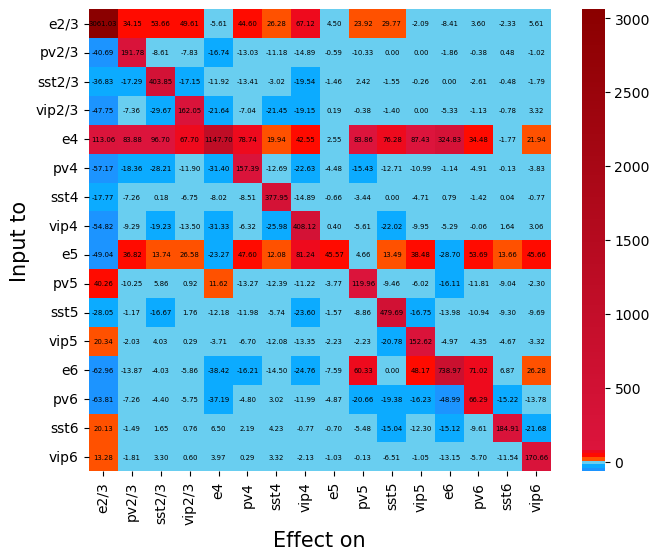

In [49]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").
from matplotlib.colors import LinearSegmentedColormap

#create the figure
fig = plt.figure(figsize=(8, 6)) 
#labels
x_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
y_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis

# colors = [(0, 'blue'),
#           (selected_values_neg_new[0], 'blue'),
#           (selected_values_neg_new[1], 'deepskyblue'),
#           (selected_values_neg_new[2], 'lightblue'),
#           (0.5, 'white'), 
#           (selected_values_new[0], 'yellow'),
#           (selected_values_new[1], 'orange'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'darkred'), 
#           (1, 'black')]

colors = [(0, 'darkblue'),
          (selected_values_neg_new[0], 'dodgerblue'),
          (selected_values_neg_new[1], 'deepskyblue'),
          (selected_values_neg_new[2], 'lightblue'),
          (0.5, 'white'), 
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]

# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)


mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,norm=norm,center=0,square=True,cmap=custom_cmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,mask=np.isnan(m_import),fmt=".2f", annot_kws={"size": 5, "color": "black"}) # plot with heatmap
mA_plot.set_xlabel('Effect on', fontsize=15)
mA_plot.set_ylabel('Input to', fontsize=15)
#plt.title('Matrix baseline',fontsize=18)
#plt.title('Matrix FF',fontsize=18)

#Show the plot
plt.show(mA_plot)

In [50]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_import).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_import, np.nan)


[30.610278  1.917823  4.038462  1.620536 11.476986  1.573942  3.779456
  4.081238  0.455707  1.199617  4.796899  1.526178  7.389657  0.662892
  1.849114  1.706633]


In [51]:
print(original_diagonal_values)

[30.610278  1.917823  4.038462  1.620536 11.476986  1.573942  3.779456
  4.081238  0.455707  1.199617  4.796899  1.526178  7.389657  0.662892
  1.849114  1.706633]


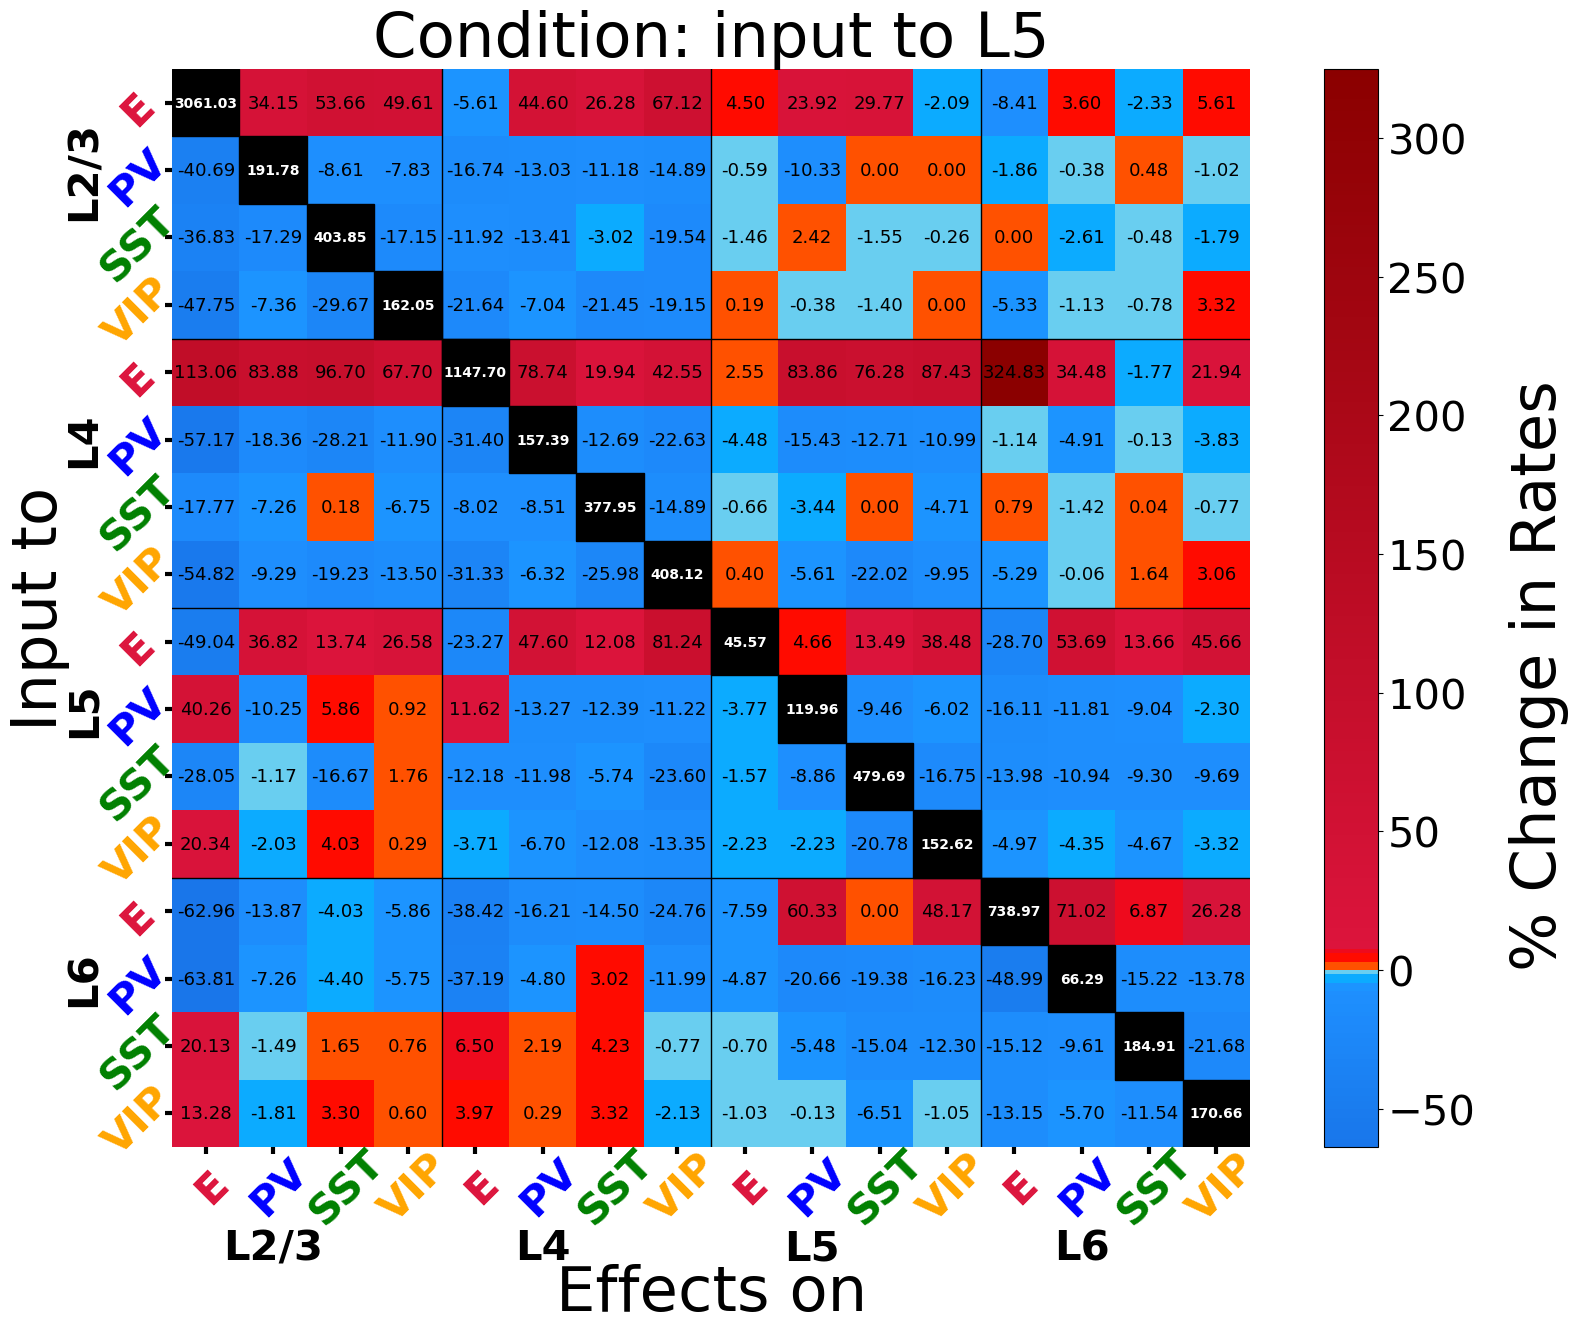

In [53]:
from matplotlib.colors import LinearSegmentedColormap

#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure


#norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)
norm = plt.Normalize(vmin=np.nanmin(m_import)*100, vmax=np.nanmax(m_import)*100)

#cmap='PRGn'
#Plot
mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 13, "color": "black"}) # plot GH with heatmap


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_import.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(4, 0,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
#plt.title('Feedforward condition',fontsize=45)  #Fig 2B

#plt.title('Spontaneous condition 1',fontsize=45) #Fig 2A
# plt.title('Condition: input to L6',fontsize=45) #Fig 2A
# plt.title('Condition: input to L2/3',fontsize=45) #Fig 2A
plt.title('Condition: input to L5',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5 & L2/3',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5 & L2/3 & L6',fontsize=45) #Fig 2A
#plt.title('Condition: input to L5',fontsize=45) #Fig 2A
# plt.title('Condition: input to L4 & L5',fontsize=45) #Fig 2A

#Save the image
#Fig 2A:

plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_1.png', bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_spont1.png', bbox_inches='tight')



plt.show(mA_plot)

In [142]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").

# fig = plt.figure(figsize=(8, 6)) #create the figure
# x_axis_labels = ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
# y_axis_labels = ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
# mA_plot = sns.heatmap(np.array(m_import),square=True,cmap='Reds',xticklabels=x_axis_labels, yticklabels=y_axis_labels) # plot GH with heatmap
# #norm=LogNorm()
# mA_plot.set_xlabel('Effect on', fontsize=15)
# mA_plot.set_ylabel('Input to', fontsize=15)
# plt.title('Matrix state',fontsize=18)
# plt.show(mA_plot)

In [29]:
#I WANT A MATRIX with:
#1 if the fr is increased (by more than threshold%)
#-1 if the fr is decreased (by more than threshold%)
#0 if is the same (less/more by less than threshold%)

sign_matrix= [[1 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 

for h in range(0,16):
    for k in range(0,16):
        if m_import[h][k]>0 and m_import[h][k]>threshold :
            sign_matrix[h][k]=1
        elif abs(m_import[h][k])<threshold :
            sign_matrix[h][k]=0
        elif m_import[h][k]<0 and abs(m_import[h][k])>threshold :
            sign_matrix[h][k]=-1
#print(sign_matrix)     

In [30]:
#Save the sign matrix in one file
#create a name for the file containing the matrix
filename_matrix_sign=str(threshold)+'_sign_'+filename_matrix
print(filename_matrix_sign)

#Save the matrix
f=open('../simulations_data/REVISIONS_1/matrix/'+filename_matrix_sign,'w+') #create the file to write the values of the sign matrix
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %sign_matrix[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

0.2_sign_Sim_e4_0pA_e5_150pA_pert_30pA.txt


In [31]:
#I import the matrix I just created
sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/'+filename_matrix_sign)

In [15]:
#Figure 3A
#I create the perturbation matrix plot

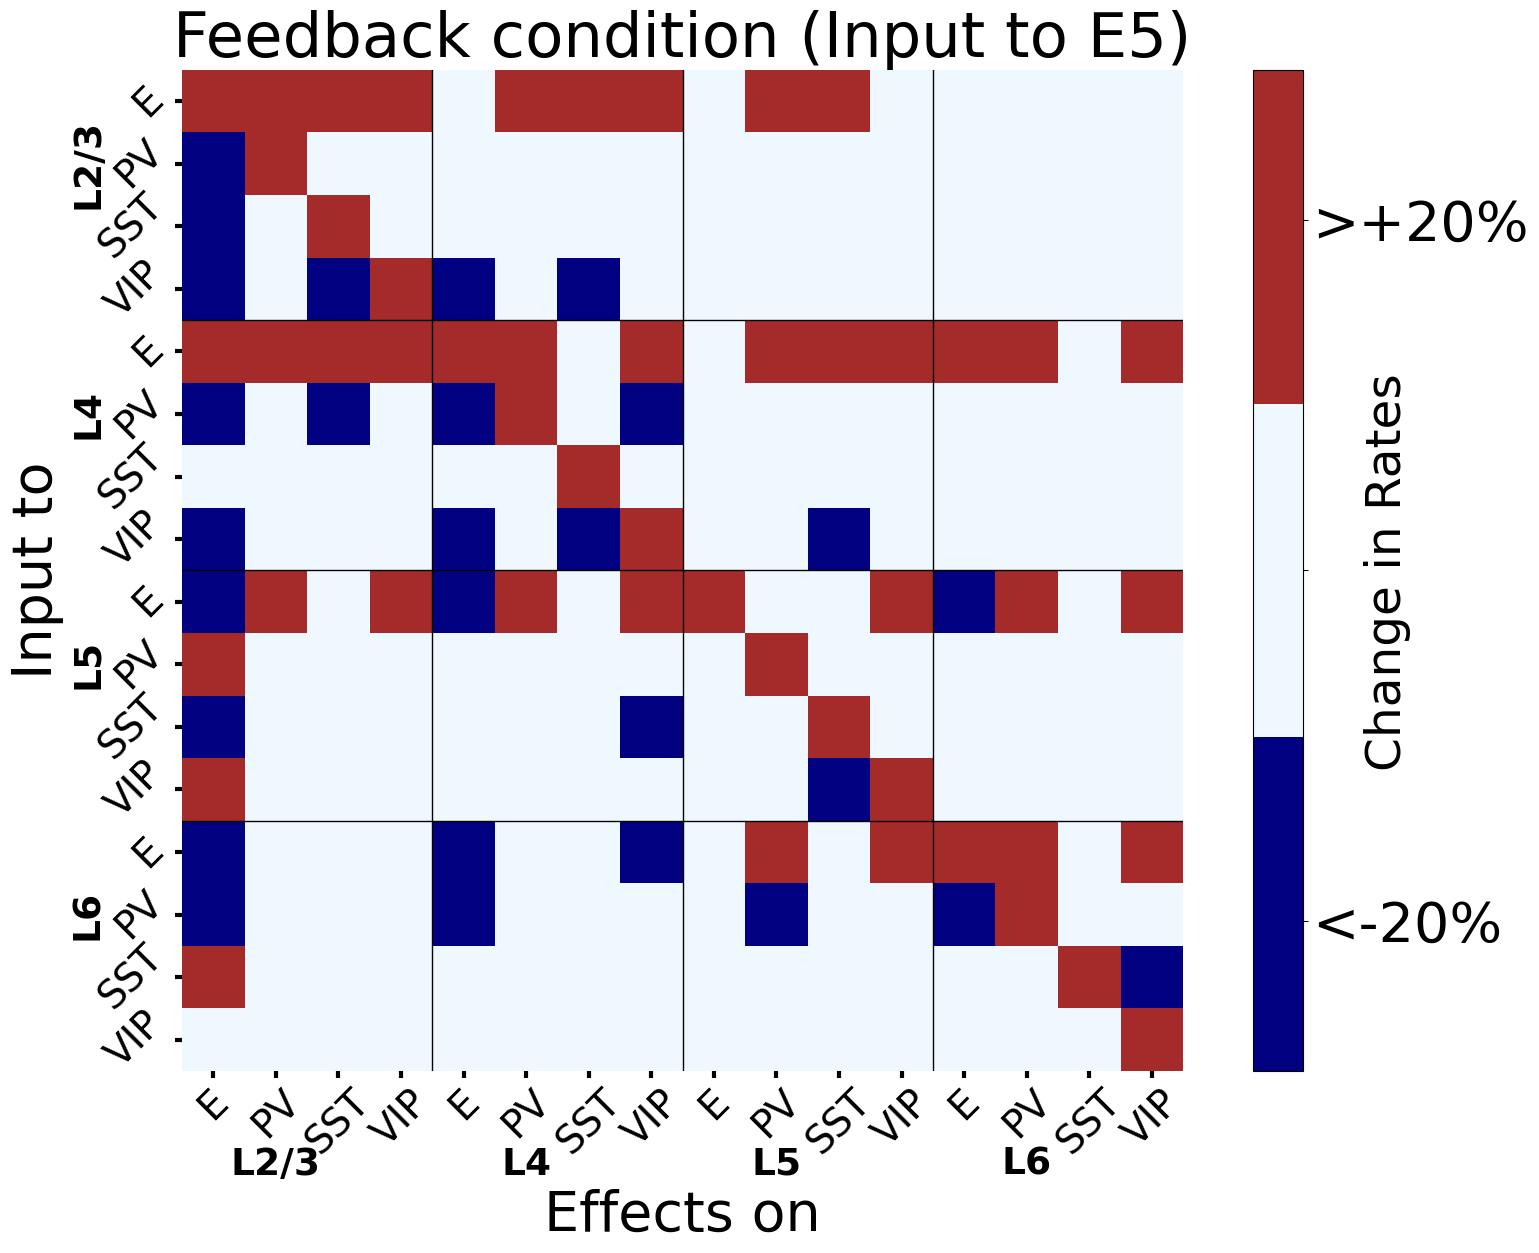

In [34]:
fig = plt.figure(figsize=(18, 13)) #create the figure

#Labels for the axes
x_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP'] # labels for x-axis
y_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']


colors = ["navy", "aliceblue",'brown' ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap
#Layout
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels(mA_plot.get_xmajorticklabels(), fontsize = 28,rotation=45)
mA_plot.set_yticklabels(mA_plot.get_ymajorticklabels(), fontsize = 28,rotation=45)

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=27, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.5, pos, label, ha='center', va='center', fontsize=27, fontweight='bold', rotation=90)

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['<-20%', '', '>+20%'])
# colorbar.set_ticklabels(['>-10%', '0', '>10%'])
# colorbar.set_ticklabels(['>-30%', '0', '>30%'])
# colorbar.set_ticklabels(['>-50%', '0', '>50%'])

cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(2.7, -0.4, 'Change in Rates', rotation=90, va='bottom', ha='center', fontsize=35)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=40)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=40, labelpad=20)
mA_plot.set_ylabel('Input to', fontsize=40, labelpad=20)
figure_name=filename_matrix.replace('.txt', '')
#plt.title(figure_name,fontsize=40)
plt.title('Feedback condition (Input to E5)',fontsize=45)

#plt.title('Condition: input to L5',fontsize=45)


#plt.title('Spontaneous condition 1',fontsize=45)


#Save fig
plt.savefig('../IMAGES/REVISIONS_1/'+'fig3_'+figure_name+'.png', bbox_inches='tight') #Fig. 3A

#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_20%.png', bbox_inches='tight')


plt.show(mA_plot)

In [152]:
#Figure 3B - Comparison between two matrices

In [156]:
#Comparison Feedforward and spontaneous 
sign_baseline=np.loadtxt('../simulations_data/REVISIONS_1/matrix/0.2_sign_Sim_e5_0pA.txt')
sign_input=np.loadtxt('../simulations_data/REVISIONS_1/matrix/0.2_sign_Sim_e4_0pA_e5_150pA_pert_30pA.txt')

In [157]:
sign_matrix_diff= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 
#0 means no change
#1 means change increase: from -1 to 0, 0 to 1, -1 to 1
#- 1 means change decrease: from 1 to 0, from 0 to -1
for h in range(0,16):
    for k in range(0,16):
        if sign_baseline[h][k]== sign_input[h][k]:
            sign_matrix_diff[h][k]=0  
    
        if sign_baseline[h][k]== 1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==0 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1    

        if sign_baseline[h][k]== -1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=1
        if sign_baseline[h][k]==0 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1
            

        if sign_baseline[h][k]==1 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==-1 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1

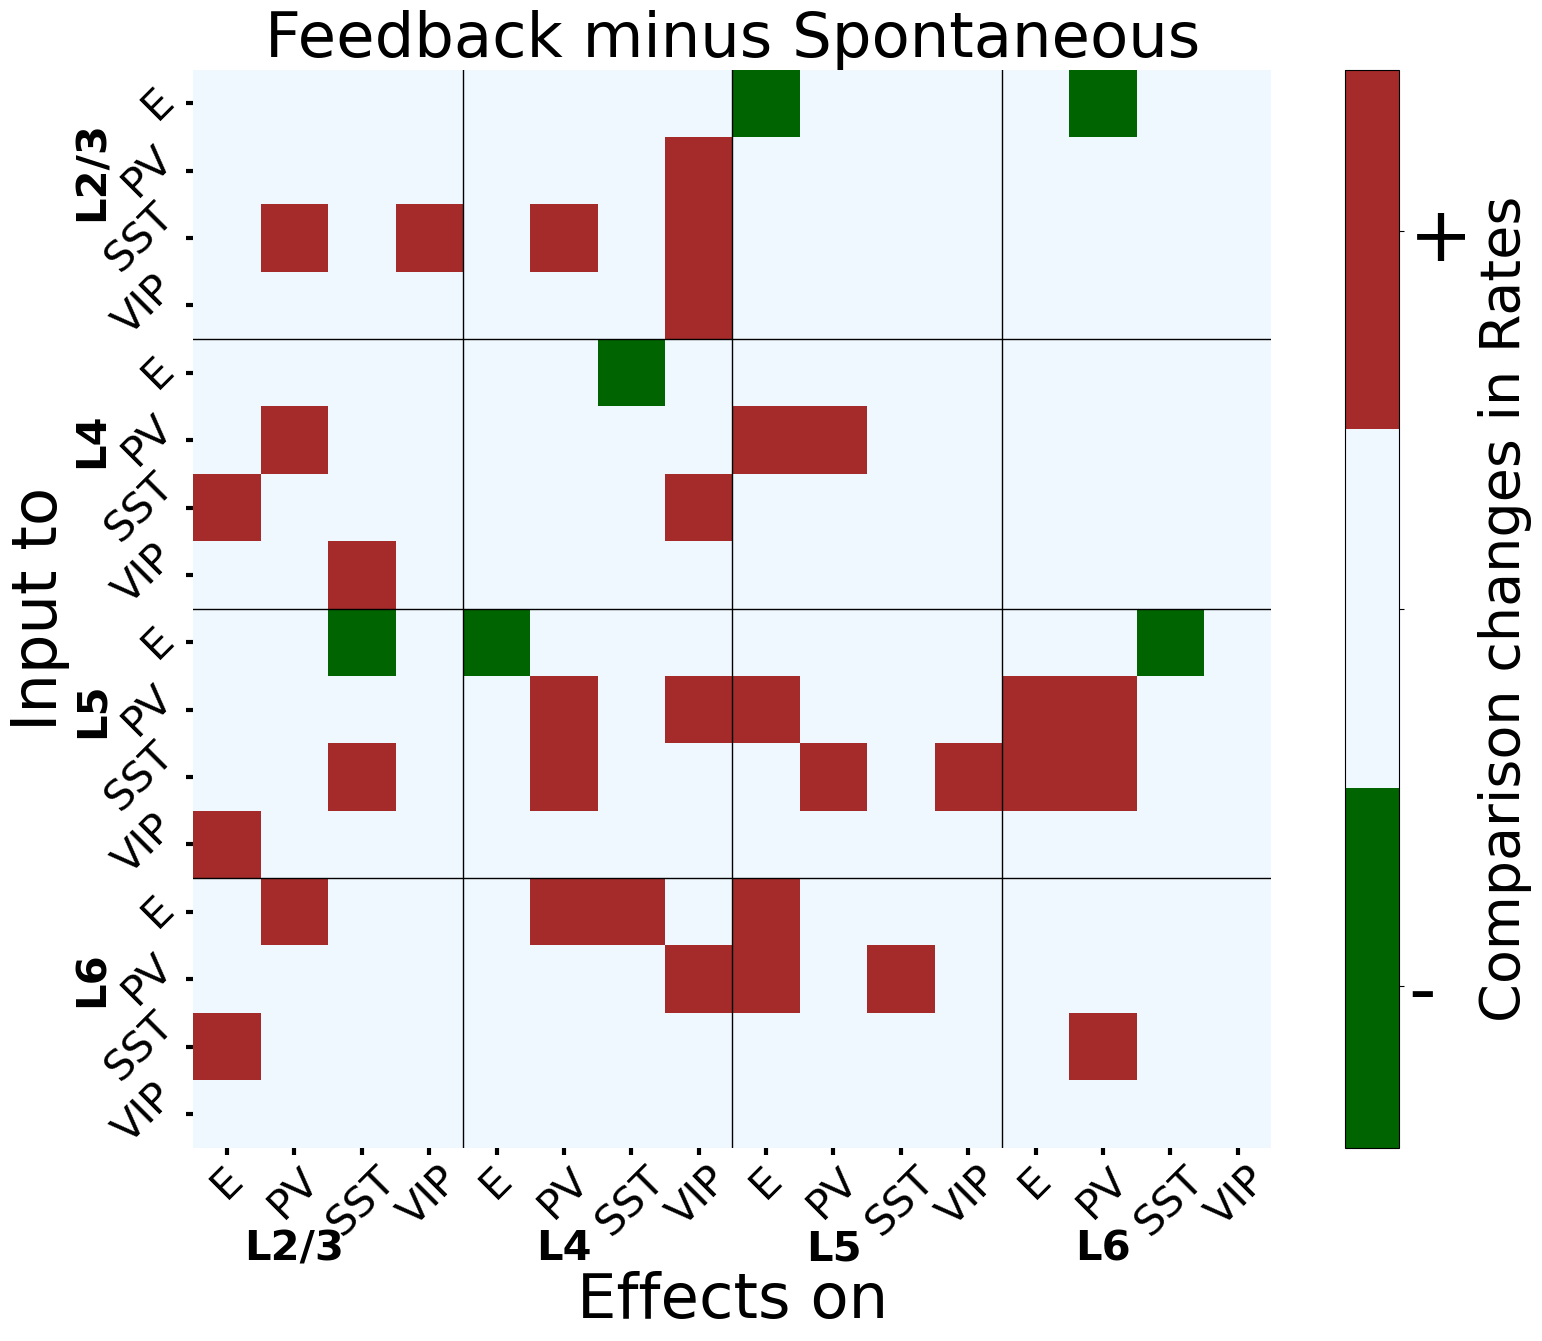

In [159]:
fig = plt.figure(figsize=(19, 14)) #create the figure

x_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP'] # labels for x-axis
y_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']


# Set your custom color palette
colors = ["darkgreen", "aliceblue",'brown' ]
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)


#plot
mA_plot = sns.heatmap(np.array(sign_matrix_diff),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap

#Layout
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels(mA_plot.get_xmajorticklabels(), fontsize = 30,rotation=45)
mA_plot.set_yticklabels(mA_plot.get_ymajorticklabels(), fontsize = 30,rotation=45)

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.5, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Line to guide the eye
for i in range(4, 16, 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

#Set bar layout
cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['-', '', '+'])
colorbar.set_label("Comparison changes in Rates",size=40)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=55)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=20)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=20)
plt.title('Feedback minus Spontaneous',fontsize=45)
   
#Save fig   
plt.savefig('../IMAGES/REVISIONS_1/fig3_matrix_FB_DIFFvsSpont.png', bbox_inches='tight')
    

plt.show(mA_plot)

In [54]:
m_import_base=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont1.txt') #For spontaneous
m_import_ff=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt')   #For FF

m_diff = m_import_ff - m_import_base

In [55]:
#THis is to find the values for the color map
matrix=m_diff
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/5) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.abs(np.min(matrix))))
print(selected_values_neg_new)

[4.650000e-04 5.690000e-04 1.099000e-03 1.215000e-03 1.463000e-03
 1.954000e-03 3.317000e-03 4.113000e-03 4.186000e-03 4.311000e-03
 4.756000e-03 5.029000e-03 5.184000e-03 5.244000e-03 5.424000e-03
 6.400000e-03 6.793000e-03 7.679000e-03 7.737000e-03 8.077000e-03
 8.131000e-03 9.705000e-03 1.116900e-02 1.151100e-02 1.164700e-02
 1.209800e-02 1.278100e-02 1.324500e-02 1.349900e-02 1.359900e-02
 1.401900e-02 1.449400e-02 1.492500e-02 1.824600e-02 1.859300e-02
 1.880600e-02 1.918000e-02 1.919200e-02 1.921400e-02 2.089300e-02
 2.098000e-02 2.154200e-02 2.278400e-02 2.324100e-02 2.338400e-02
 2.410600e-02 2.452900e-02 2.487300e-02 2.487600e-02 2.503800e-02
 2.510100e-02 2.559400e-02 2.580800e-02 2.669200e-02 2.691600e-02
 2.693900e-02 2.705000e-02 3.037500e-02 3.061200e-02 3.067600e-02
 3.129000e-02 3.182700e-02 3.193200e-02 3.405100e-02 3.574000e-02
 3.685200e-02 3.738200e-02 3.754400e-02 3.794700e-02 3.938400e-02
 3.993500e-02 4.027300e-02 4.062700e-02 4.106800e-02 4.137400e-02
 4.213900e

In [56]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_diff).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_diff, np.nan)



[  7.399435  -0.611278  -0.636977  -0.569653  -0.840694  -0.777573
  -0.519155 -18.834425  -3.223154  -0.889952  -0.256169  -0.964476
   0.937909  -0.863356  -0.41068   -1.499716]


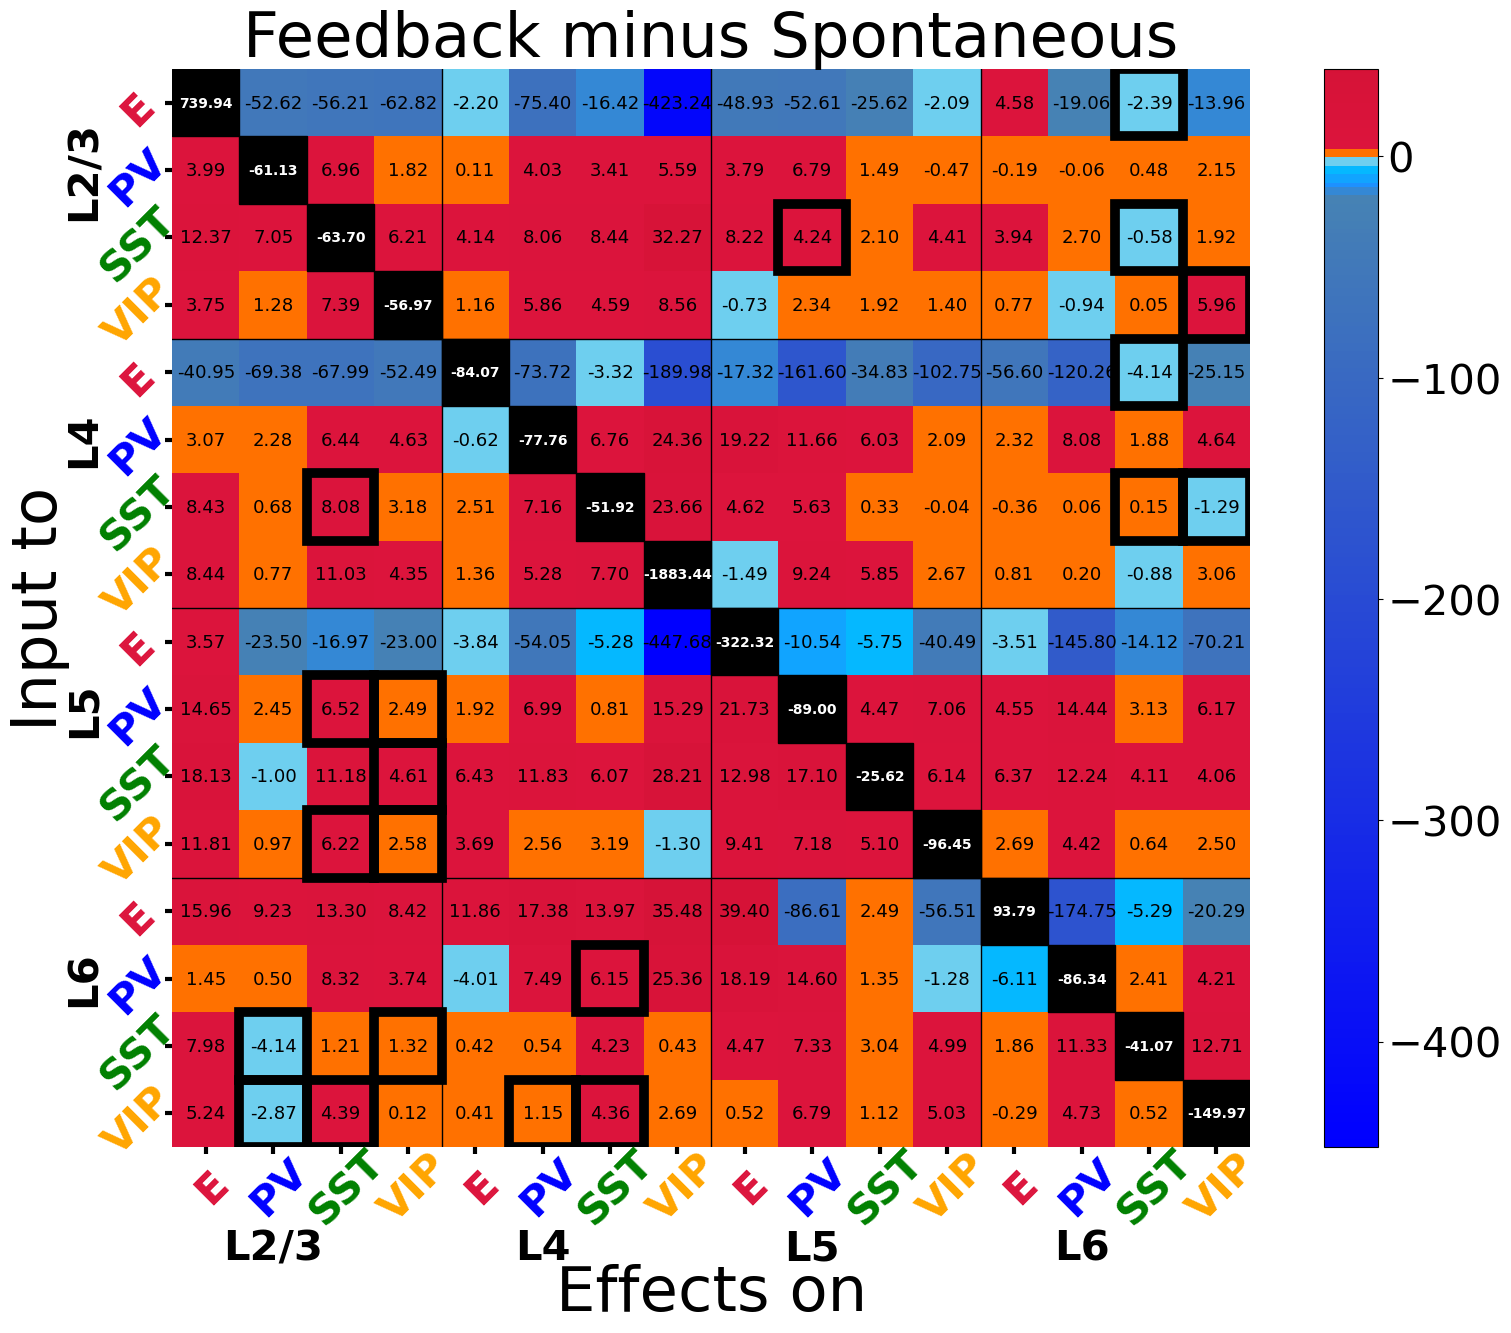

In [58]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = [(0, 'blue'),
          (selected_values_neg_new[1], 'steelblue'),
          (selected_values_neg_new[2], 'dodgerblue'),
          (selected_values_neg_new[3], 'deepskyblue'),
          (selected_values_neg_new[4], 'lightblue'),
          (0.5, 'white'),
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]




# colors = [(0, 'darkblue'),
#           (selected_values_neg_new[1], 'blue'),
#           (selected_values_neg_new[2], 'steelblue'),
#           (selected_values_neg_new[3], 'deepskyblue'),
#           (selected_values_neg_new[4], 'lightblue'),
#           (0.5, 'white'),
#           (selected_values_new[0], 'orange'),
#           (selected_values_new[1], 'orangered'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'crimson'), 
#           (1, 'darkred')]

matrix1=m_import_ff  
matrix2=m_import_base

highlight_mask = ((matrix1 > 0) & (matrix2 < 0)) | ((matrix1 < 0) & (matrix2 > 0))


# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.nanmin(m_diff)*100, vmax=np.nanmax(m_diff)*100)


#norm = plt.Normalize(vmin=np.min(m_diff)*100, vmax=np.max(m_diff)*100)
#cmap='PRGn'
#cmap=custom_cmap
#Plot
mA_plot = sns.heatmap(np.array(m_diff)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 13, "color": "black"}) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')



# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_diff.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
#cbar.ax.text(4, -910,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
plt.title('Feedback minus Spontaneous',fontsize=45)

for i in range(highlight_mask.shape[0]):
    for j in range(highlight_mask.shape[1]):
        if highlight_mask[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=7))


#Save the image
plt.savefig('../IMAGES/REVISIONS_1/fig3_matrix_diff_colors_Blackblue.png', bbox_inches='tight')

plt.show(mA_plot)